AMCAT known as Aspiring Minds Computer Adaptive Test is an AI-based computer adaptive test which evaluates job applicants on critical areas like communication skills, logical reasoning, quantitative skills, and job-specific domain skills thereby helping recruiters identify the suitability of a candidate for different job roles.

A study carried out on students with engineering disciplines by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO) showed the employment outcomes of engineering graduates along with the standardized scores from three different areas - cognitive skills, technical skills and personality skills. The study also recorded the demographic features for each candidate.

With this study, the AMCAT team were able to gather concrete data with which they hoped to understand what has become of candidates since they took part in the tests.They also have highlighted some areas or questions of interest they would like to have answers to. As a data scientist on the AMCAT team, my task is to perform an comprehensive analysis, leaving no stones unturned.

### Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import datetime
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
df = pd.read_csv("amcat.csv")

In [3]:
# Displaying the top five rows of the datset
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
# Shape of the dataset
df.shape

(3998, 39)

The dataset contains the employment outcomes of engineering graduates.The dataset  contains  around 39 independent variables and 3998 data points

In [5]:
# Checking the columns characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [6]:
# Checking for the duplicate in the dataset 
df.duplicated().sum()

0

In [7]:
# Checking for null vlaues in the dataset
df.isna().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [8]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [9]:
# Checking the datatypes of the columns
df.dtypes

Unnamed: 0                object
ID                         int64
Salary                   float64
DOJ                       object
DOL                       object
Designation               object
JobCity                   object
Gender                    object
DOB                       object
10percentage             float64
10board                   object
12graduation               int64
12percentage             float64
12board                   object
CollegeID                  int64
CollegeTier                int64
Degree                    object
Specialization            object
collegeGPA               float64
CollegeCityID              int64
CollegeCityTier            int64
CollegeState              object
GraduationYear             int64
English                    int64
Logical                    int64
Quant                      int64
Domain                   float64
ComputerProgramming        int64
ElectronicsAndSemicon      int64
ComputerScience            int64
Mechanical

In [10]:
# Checking the columns in the dataset
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

#### Observations:

1. The DOJ and DOB columns needs to be converted from object to the date type

2. The DOL column though it contains date values would be left in the object type since it contains 'present' string values which indicates that the candidate still works at a company.

3. The 'Unnamed: 0','CollegID','CollegeCityID' column appears to be irrelevant fo this exploratory data analysis, and hence would need to be removed or dropped

4. There appear to be no null values (na) in any columns; however, some columns contain -1 and other negative values, which indicates that these values are not available and needs to be replaced with NaN instead.

For the persoanlity traits assessments, it means that there was no valid score or assessment provided for that particular trait.

In [11]:
# Converting the columns in to date format
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['DOB'] = pd.to_datetime(df['DOB'])

In [12]:
# Dropping the columns
df.drop(['Unnamed: 0','ID','CollegeID','CollegeCityID'],axis = 1, inplace = True)

In [13]:
# Dividing the dataframe to different columns based on their datatypes
categorical_cols = df.select_dtypes(include=['object'])
numerical_cols = df.select_dtypes(include=['int64','float64'])
datetime_cols = df.select_dtypes(include=['datetime64[ns]'])

In [14]:
categorical_cols

,DOL,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState
0,present,senior quality engineer,Bangalore,f,"board ofsecondary education,ap","board of intermediate education,ap",B.Tech/B.E.,computer engineering,Andhra Pradesh
1,present,assistant manager,Indore,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Madhya Pradesh
2,present,systems engineer,Chennai,f,cbse,cbse,B.Tech/B.E.,information technology,Uttar Pradesh
3,present,senior software engineer,Gurgaon,m,cbse,cbse,B.Tech/B.E.,computer engineering,Delhi
4,3/1/15 0:00,get,Manesar,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh
...,...,...,...,...,...,...,...,...,...
3993,10/1/12 0:00,software engineer,New Delhi,m,cbse,cbse,B.Tech/B.E.,information technology,Haryana
3994,7/1/13 0:00,technical writer,Hyderabad,f,state board,state board,B.Tech/B.E.,electronics and communication engineering,Telangana
3995,present,associate software engineer,Bangalore,m,"bse,odisha","chse,odisha",B.Tech/B.E.,computer engineering,Orissa
3996,1/1/15 0:00,software developer,Asifabadbanglore,f,state board,state board,B.Tech/B.E.,computer science & engineering,Karnataka


In [15]:
datetime_cols

,DOJ,DOB
0,2012-06-01,1990-02-19
1,2013-09-01,1989-10-04
2,2014-06-01,1992-08-03
3,2011-07-01,1989-12-05
4,2014-03-01,1991-02-27
...,...,...
3993,2011-10-01,1987-04-15
3994,2013-07-01,1992-08-27
3995,2013-07-01,1991-07-03
3996,2014-07-01,1992-03-20


In [16]:
numerical_cols

,Salary,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,84.30,2007,95.80,2,78.00,0,2011,515,585,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,85.40,2007,85.00,2,70.06,0,2012,695,610,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,85.00,2010,68.20,2,70.00,0,2014,615,545,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,85.60,2007,83.60,1,74.64,1,2011,635,585,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,78.00,2008,76.80,2,73.90,0,2012,545,625,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000.0,52.09,2006,55.50,2,61.50,0,2010,365,334,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,100000.0,90.00,2009,93.00,2,77.30,1,2013,415,410,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,320000.0,81.86,2008,65.50,2,70.00,0,2012,475,475,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,200000.0,78.72,2010,69.88,2,70.42,1,2014,450,410,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


## Univariate Analysis

## Numerical Features

In [17]:
def boxplot(data,col):
# Create a boxplot
    plt.boxplot(data[col])

    # Add labels and title
    plt.xlabel(f'{col}')
    plt.ylabel('Y-axis Label')
    plt.title(f'Boxplot of {col}')

    # Show the plot
    plt.show()
    

# Plotting KDE and histogram using Seaborn
def hist_kde(data,col):
    sns.histplot(data[col], kde=True, bins=10, color='skyblue', edgecolor='black')

    # Adding labels and title
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'KDE and Histogram of {col}')

    # Display the plot
    plt.show()

### Salary Column

In [18]:
numerical_cols['Salary'].describe()

count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

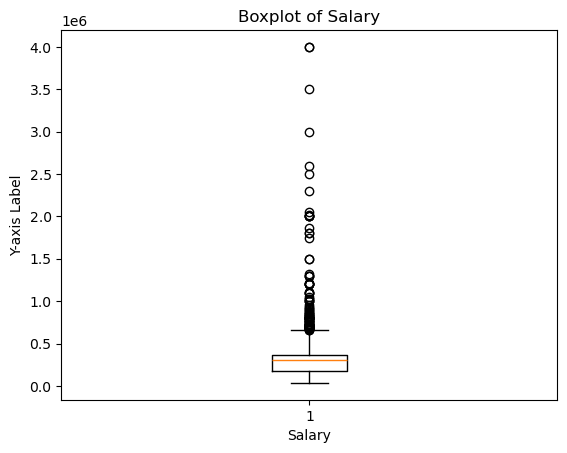

In [19]:
boxplot(df,'Salary')

Observations:
As we can see there are several outliers in the salary column which is not good for our analysis, we have to deal with it

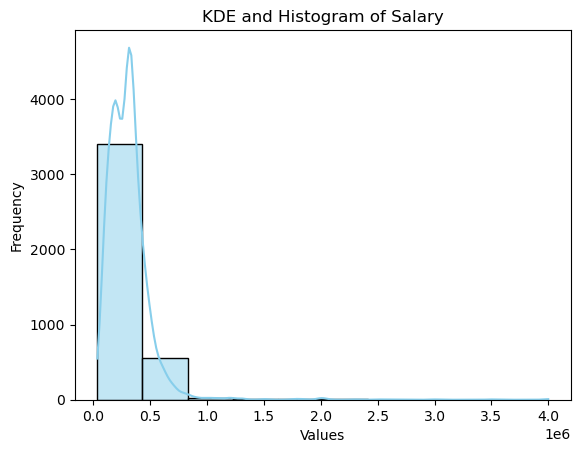

In [20]:
hist_kde(df,'Salary')

In [21]:
# Detecting the outliers
# IQR
def outliers(data,col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    lower_limit = max(data[col].min(),q1-1.5*iqr)
    upper_limit = min(data[col].max(),q3+1.5*iqr)
    lower_count = data[data[col] < lower_limit][col].count()
    upper_count = data[data[col] > upper_limit][col].count()
    #data = [q1,q3,iqr,lower_limit,upper_limit,upper_count]
    outliers_df = pd.DataFrame(data)
    print('*'*10,f'Outliers for {col}','*'*10)
    print()
    print('lower_limit: ',lower_limit)
    print('Q1 :',q1)
    print('Q3 :',q3)
    print('upper_limit: ',upper_limit)
    print('count of lower outliers :',lower_count)
    print('count of upper outliers :',upper_count)
    

    return data[(data[col] >=lower_limit) & (data[col] <= upper_limit)]

In [22]:
# Checking outliers in the Salary Column
salary = outliers(numerical_cols,'Salary')

********** Outliers for Salary **********

lower_limit:  35000.0
Q1 : 180000.0
Q3 : 370000.0
upper_limit:  655000.0
count of lower outliers : 0
count of upper outliers : 109


In [23]:
salary['Salary'].describe()

count      3889.000000
mean     285447.158653
std      126514.542129
min       35000.000000
25%      180000.000000
50%      300000.000000
75%      360000.000000
max      655000.000000
Name: Salary, dtype: float64

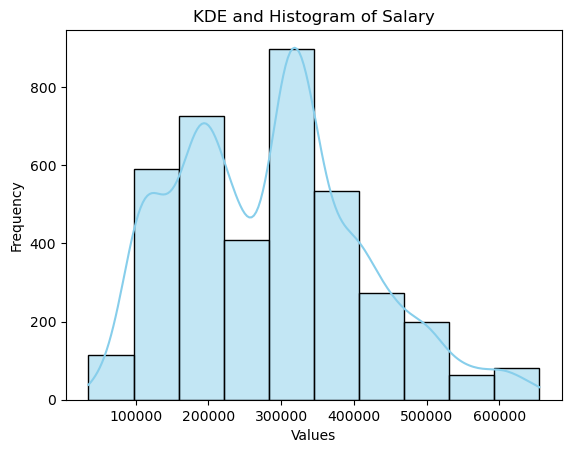

In [24]:
hist_kde(salary,'Salary')

Insights:
    From the above graph its seen that there most peoples salaries are in the range 3,00,000 lakhs to 3,50,000 

,10percentage,12percentage
count,3998.00,3998.00
mean,77.93,74.47
std,9.85,11.00
min,43.00,40.00
25%,71.68,66.00
50%,79.15,74.40
75%,85.67,82.60
max,97.76,98.70


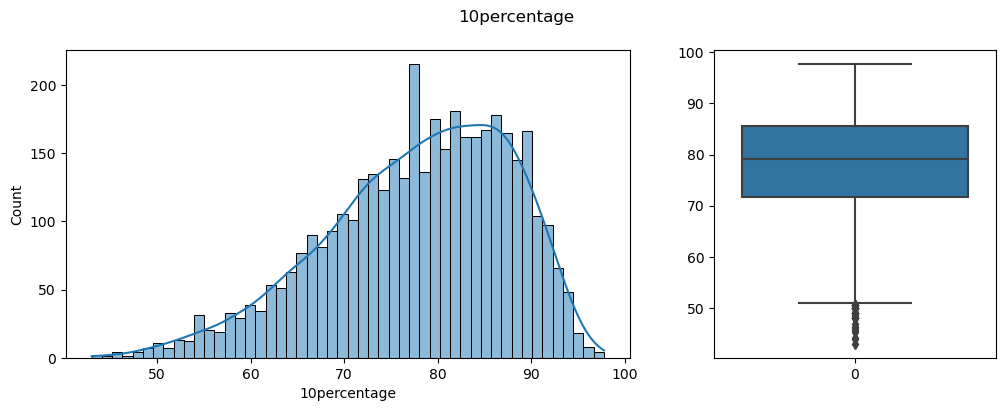

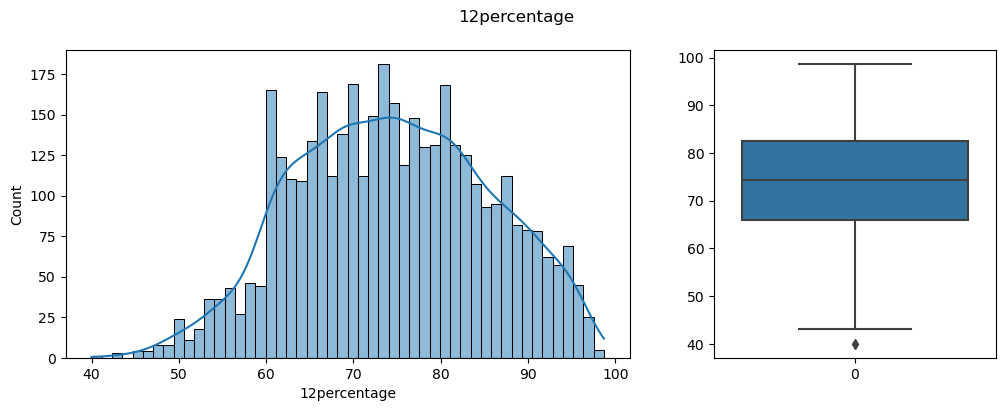

In [25]:
display(numerical_cols[['10percentage', '12percentage']].describe().round(2)) 
for col in ['10percentage', '12percentage']: 
    fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4)) 
    sns.histplot(numerical_cols[col],kde=True, ax=ax1, bins=50) 
    sns.boxplot(numerical_cols[col], ax=ax2) 
    plt.suptitle(col) 
    plt.show()

In [26]:
for col in ['10percentage','12percentage']:
    outliers(df,col)

********** Outliers for 10percentage **********

lower_limit:  50.695000000000014
Q1 : 71.68
Q3 : 85.67
upper_limit:  97.76
count of lower outliers : 30
count of upper outliers : 0
********** Outliers for 12percentage **********

lower_limit:  41.10000000000001
Q1 : 66.0
Q3 : 82.6
upper_limit:  98.7
count of lower outliers : 1
count of upper outliers : 0


Most the students tend to get around 70 to 80 percent of marks during their school and college life.

## College GPA

In [27]:
numerical_cols['collegeGPA'].describe()

count    3998.000000
mean       71.486171
std         8.167338
min         6.450000
25%        66.407500
50%        71.720000
75%        76.327500
max        99.930000
Name: collegeGPA, dtype: float64

From the above the minimum college gpa is 6 and and maximum is 99 and it is not possible to have below the passing percentage. So we are checking the values which are below passing percentage i.e., 40

In [28]:
numerical_cols[numerical_cols['collegeGPA'] < 40]['collegeGPA']

7       8.58
138     6.63
788     6.80
1419    6.85
1439    8.07
1767    7.56
2151    6.95
2229    8.13
2293    9.30
2662    8.88
2691    8.89
3308    6.45
Name: collegeGPA, dtype: float64

In [29]:
# multiplying the gpa with 10 which are less than 40

df['collegeGPA'] = df['collegeGPA'].apply(lambda x : x*10 if x < 40 else x)

In [30]:
df['collegeGPA'].describe()

count    3998.000000
mean       71.695728
std         7.406631
min        49.070000
25%        66.505000
50%        71.800000
75%        76.400000
max        99.930000
Name: collegeGPA, dtype: float64

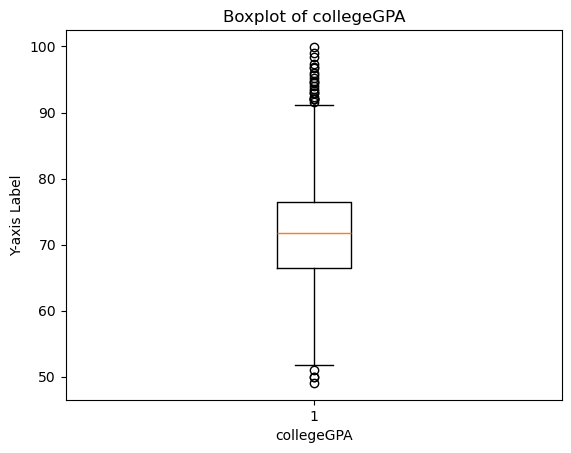

In [31]:
boxplot(df,'collegeGPA')

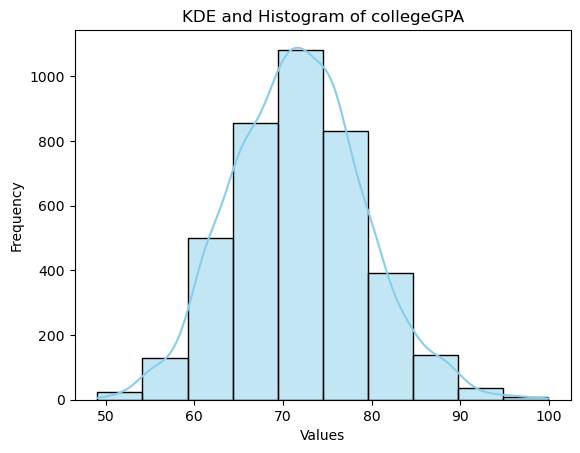

In [32]:
# ploting a histogram and kde plot of collegegpa column
hist_kde(df,'collegeGPA')

In [33]:
collegegpa = outliers(df,'collegeGPA')

********** Outliers for collegeGPA **********

lower_limit:  51.66249999999998
Q1 : 66.505
Q3 : 76.4
upper_limit:  91.24250000000002
count of lower outliers : 4
count of upper outliers : 23


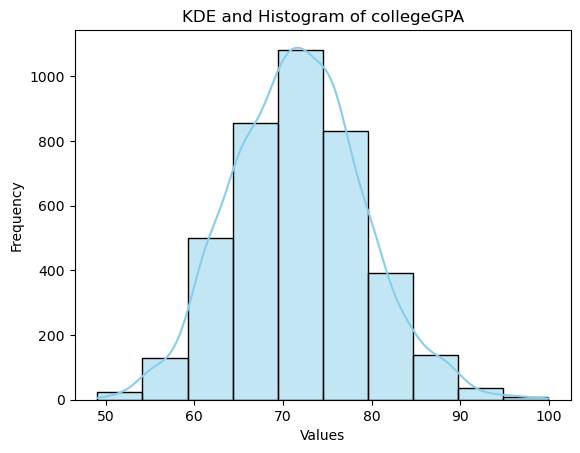

In [34]:
# applying hist_kde without outliers on the collegegpa coloumn

hist_kde(df,'collegeGPA')

Insights:
    The highest and lowest college gpa lies in the range 99 to 49 percentage and the mean percentage is 71 percentage and from the above histogram most of the data lies between 60 to 80 percentages 

## 12th Graduation

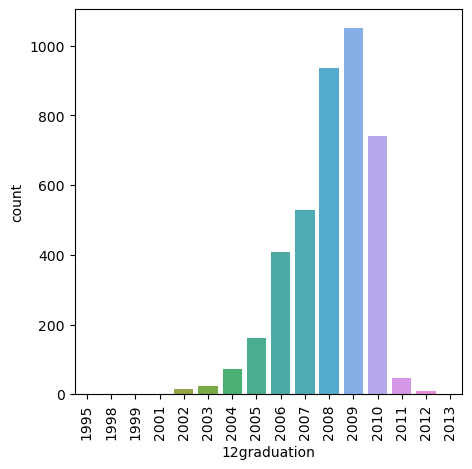

In [35]:
plt.figure(figsize=(5,5)) 
sns.countplot(data=df, x='12graduation') 
plt.xticks(rotation=90)
plt.show()

Maximum students completed 12th in 2009.

In [36]:
outliers(df,'12graduation')

********** Outliers for 12graduation **********

lower_limit:  2004.0
Q1 : 2007.0
Q3 : 2009.0
upper_limit:  2012.0
count of lower outliers : 44
count of upper outliers : 1


,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,2014-03-01,3/1/15 0:00,get,Manesar,m,1991-02-27,78.00,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000.0,2011-10-01,10/1/12 0:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,100000.0,2013-07-01,7/1/13 0:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,320000.0,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,200000.0,2014-07-01,1/1/15 0:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


## Graduation Year

In [37]:
df['GraduationYear'].describe()

count    3998.000000
mean     2012.105803
std        31.857271
min         0.000000
25%      2012.000000
50%      2013.000000
75%      2014.000000
max      2017.000000
Name: GraduationYear, dtype: float64

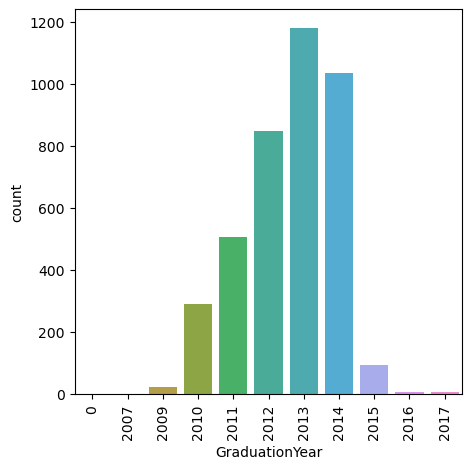

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(data=df.dropna(subset='GraduationYear'), x='GraduationYear') 
plt.xticks(rotation=90)
plt.show()

Maximum students are graduated bachelor's in 2013

### AMCAT SCORES

In [39]:
# Differentiating the scores of subjects and logical by creating lists
scores = ['English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'] 
standard_scores = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience'] 

In [40]:
df[scores].describe()

,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
count,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842
std,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505
min,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000


The value "-1" in some of the columns that represent scores could indicate missing values, so it should be replaced with NaN.

In [41]:
df[scores] = df[scores].replace(-1, np.nan)

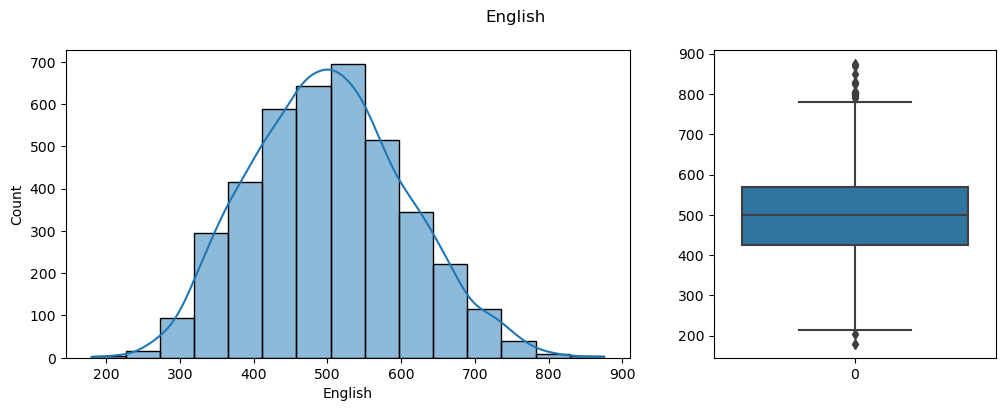

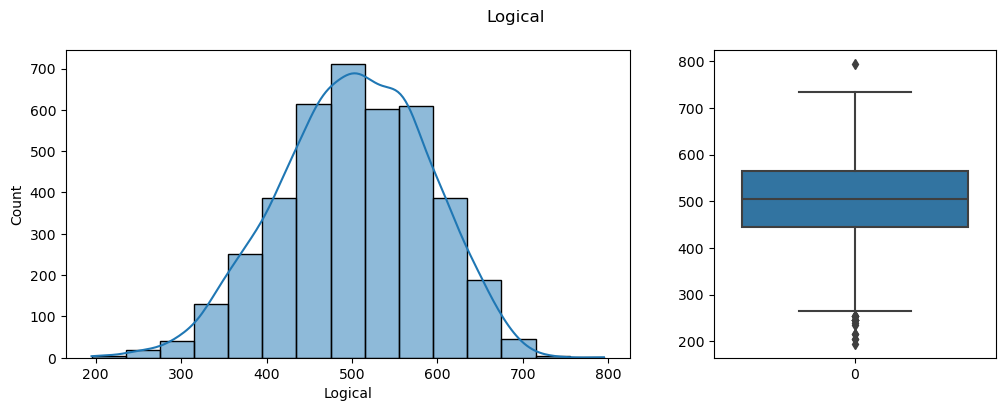

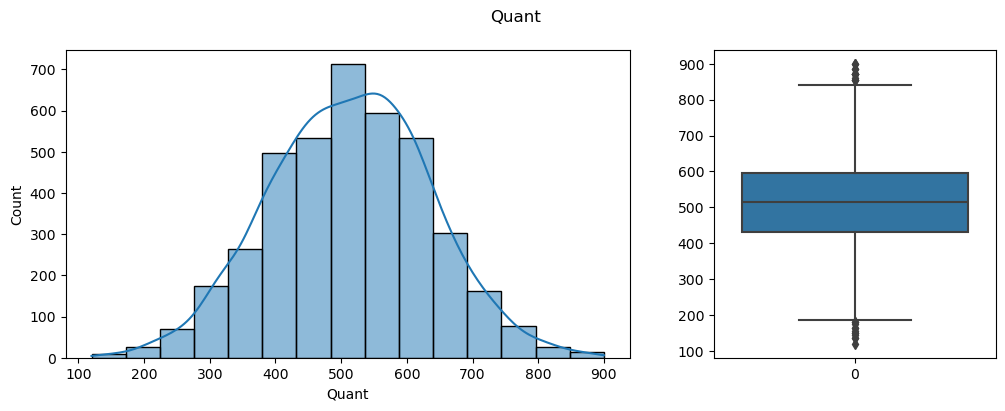

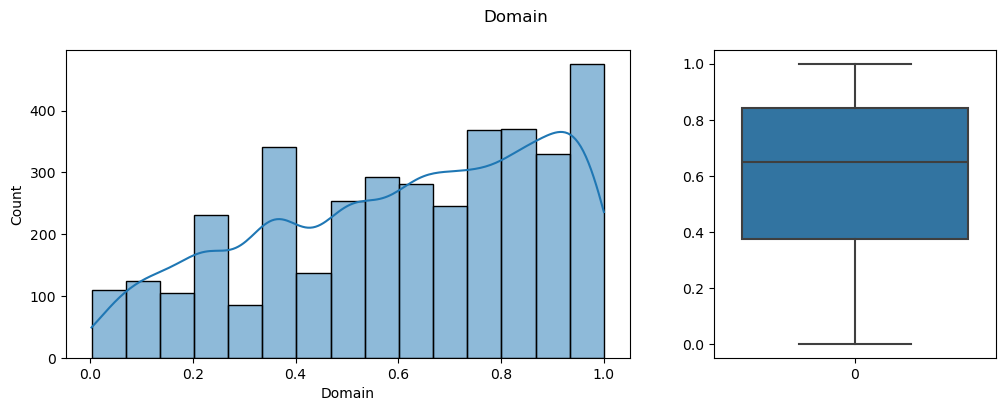

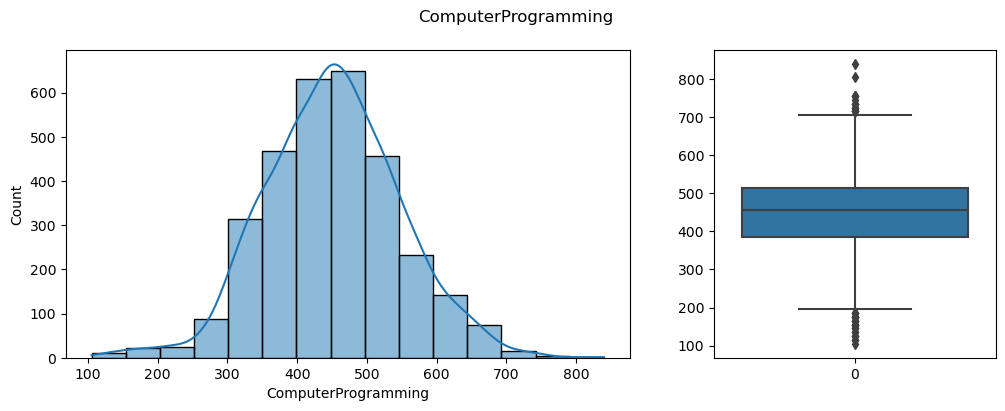

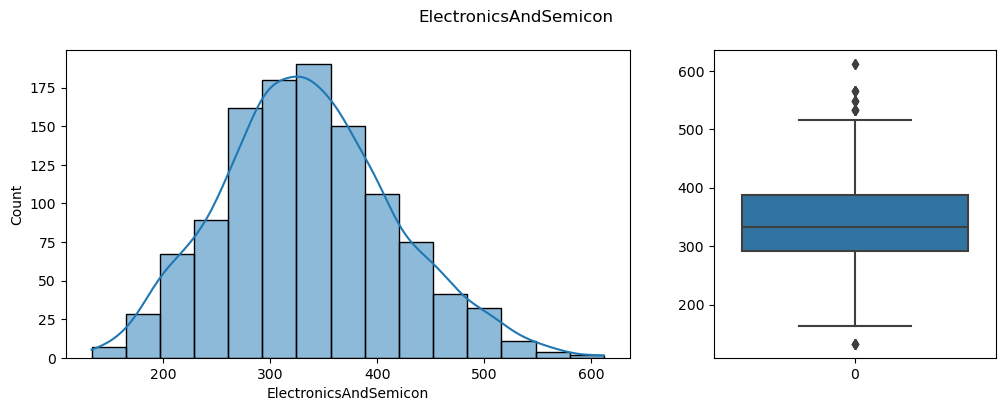

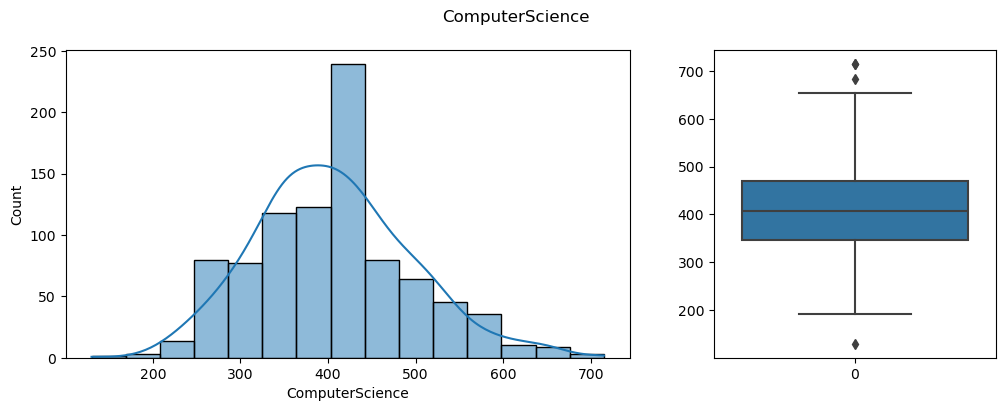

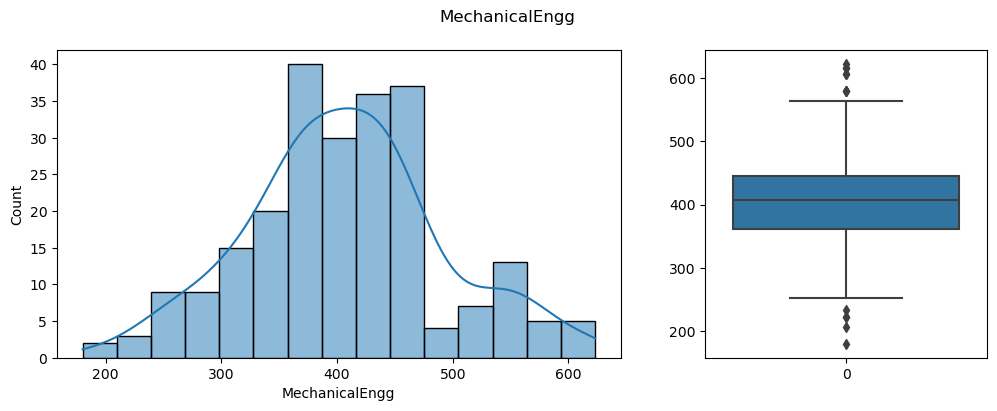

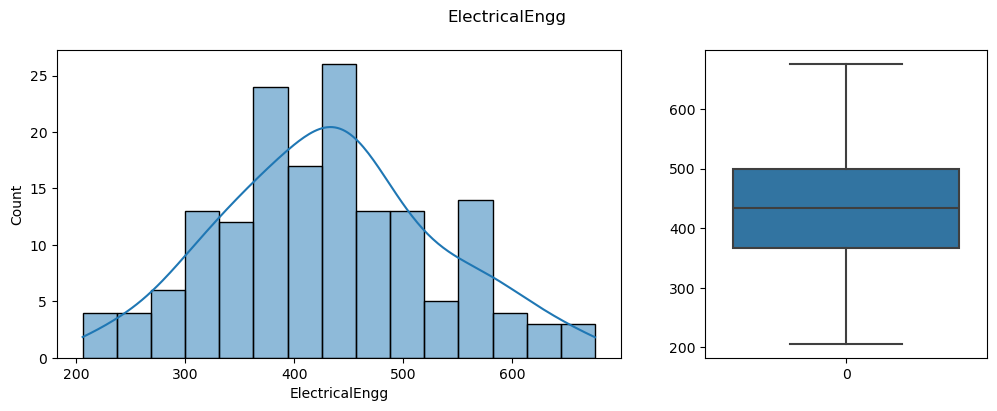

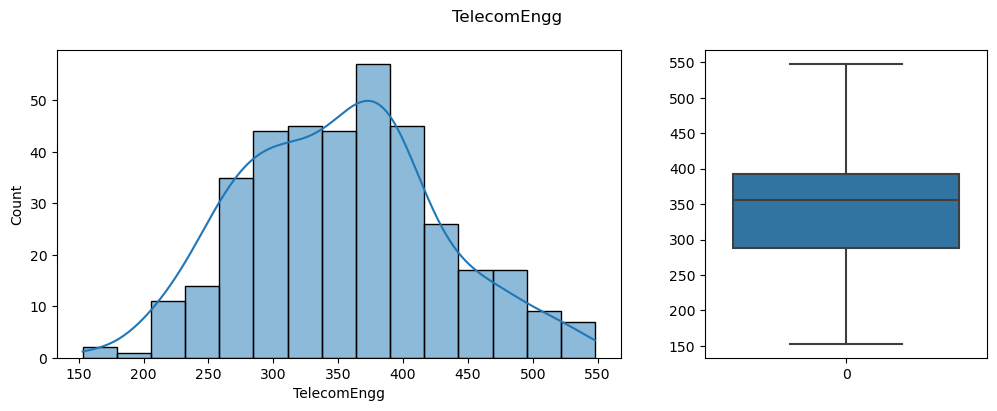

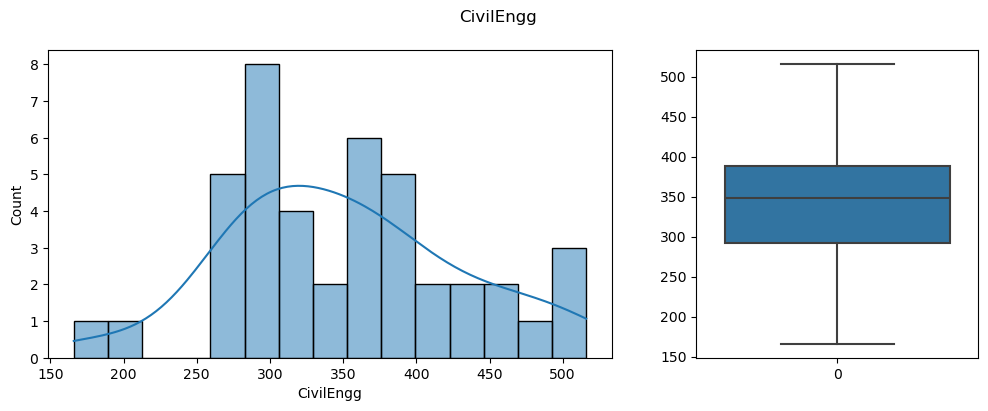

In [42]:
for col in scores: 
    fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4)) 
    sns.histplot(df[col],kde=True, ax=ax1, bins=15) 
    sns.boxplot(df[col], ax=ax2) 
    plt.suptitle(col) 
    plt.show()

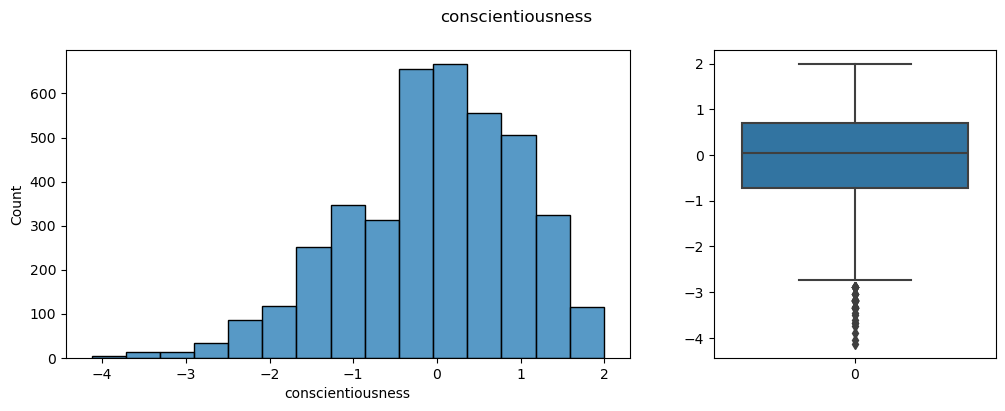

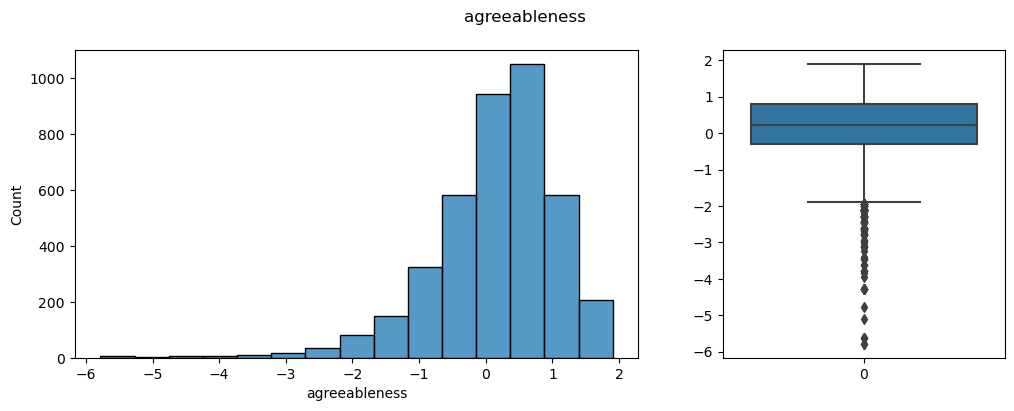

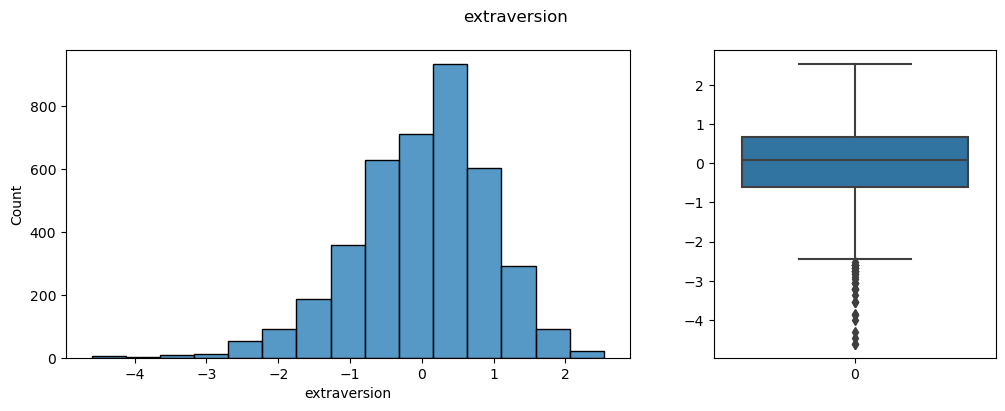

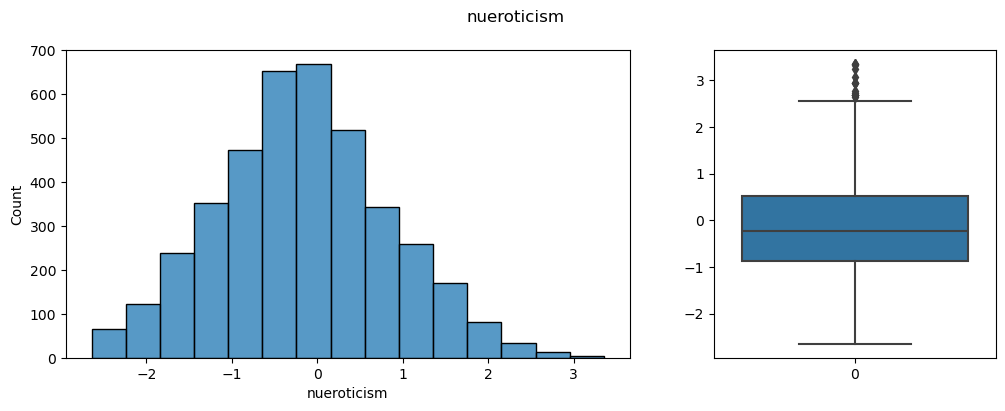

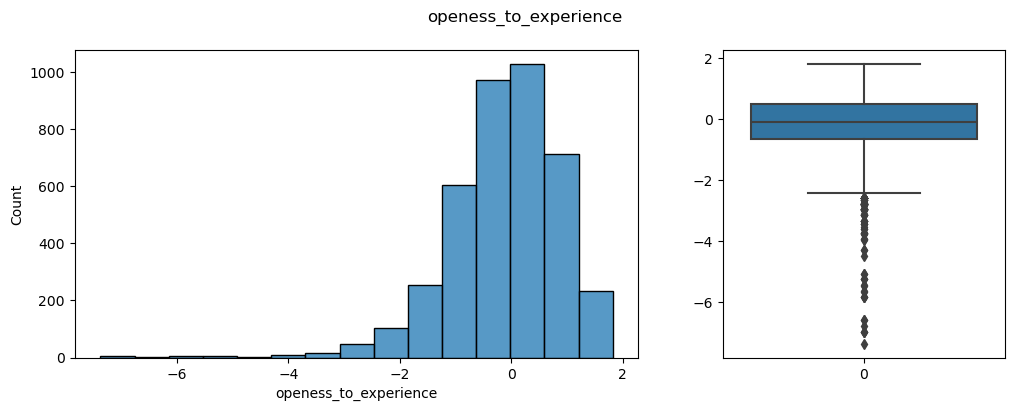

In [43]:
for col in standard_scores:
    fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4)) 
    sns.histplot(df[col], ax=ax1, bins=15) 
    sns.boxplot(df[col], ax=ax2) 
    plt.suptitle(col) 
    plt.show()

In [44]:
df[standard_scores].describe()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,1.028666,0.941782,0.951471,1.007580,1.008075
min,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.995300,1.904800,2.535400,3.352500,1.822400


Except for "Domain" scores, the distributions of unstandardized scores are more or less symmetric, with a few moderate outliers.

### DOL and JobDuration

The date when the employee left the company is listed in the "DOL" column

'present' status shows that the employee is currently working but according to the dataset it is of 2015 so with respect to that the analysis of the data is done on 2015 so instead of taking the present date as working we can take the year's end date to be the last when he left the company.

In [45]:
# Replacing values of present with date
df['DOL'] = df['DOL'].replace('present','2015/12/31 00:00:00')


In [46]:
# Coonverting DOL datatype Obj to datetiem format
df['DOL'] = pd.to_datetime(df['DOL'],format='mixed')

In [47]:
df['DOL'].value_counts()

DOL
2015-12-31    1875
2015-04-01     573
2015-03-01     124
2015-05-01     112
2015-01-01      99
              ... 
2005-03-01       1
2015-10-01       1
2010-02-01       1
2011-02-01       1
2010-10-01       1
Name: count, Length: 67, dtype: int64

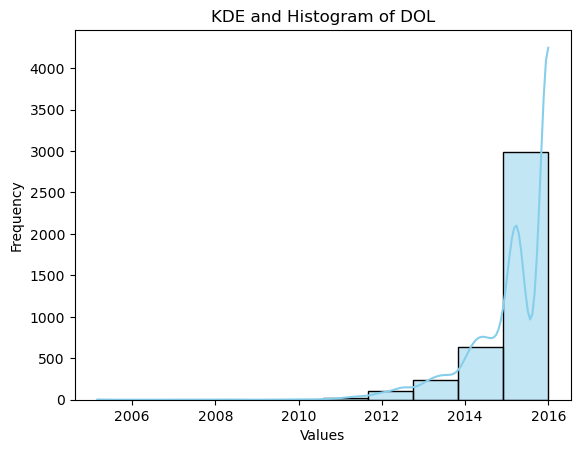

In [48]:
hist_kde(df,'DOL')

Now we calculate the at what age maximum person had started the job age and also the duration till he had done the job so extract the JobAge and JobDuration

In [49]:
df['JobAge'] = df['DOJ'].dt.year - df['DOB'].dt.year
df['JobAge'].describe()

count    3998.000000
mean       22.611306
std         1.360287
min         0.000000
25%        22.000000
50%        22.000000
75%        23.000000
max        32.000000
Name: JobAge, dtype: float64

In [50]:
# Replacing 0 with NaN values
df['JobAge'] = df['JobAge'].replace(0, np.nan)

In [51]:
df['JobDuration'] = (df['DOL'] - df['DOJ']).dt.total_seconds()/(60*60*24)
df['JobDuration'].describe().astype(int)

count    3998
mean      629
std       447
min      -303
25%       333
50%       548
75%       852
max      8979
Name: JobDuration, dtype: int32

In [52]:
df['JobDuration'] = df['JobDuration'].mask((df['JobDuration'] <= 0)|(df['JobDuration'] > 8000), np.nan)
df['JobDuration'].describe().astype(int)

count    3942
mean      638
std       420
min        28
25%       334
50%       548
75%       881
max      3651
Name: JobDuration, dtype: int32

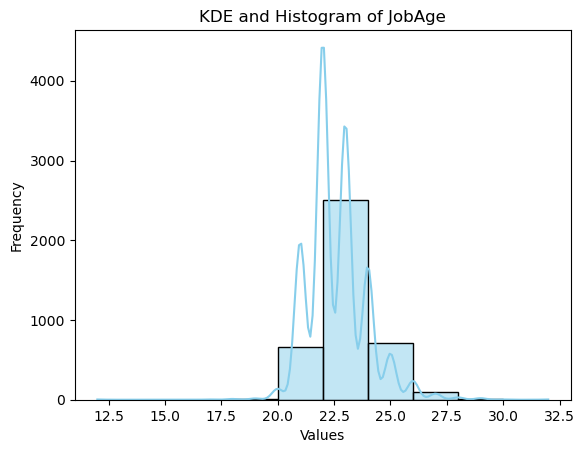

In [53]:
hist_kde(df,'JobAge')

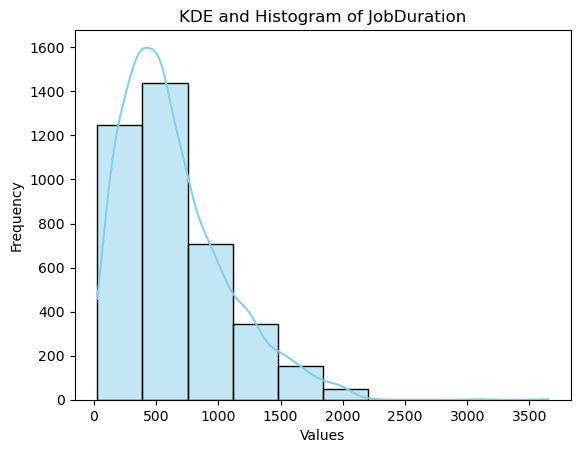

In [54]:
hist_kde(df,'JobDuration')

Insights:
    
    The majority of graduates started working between 2010 and 2014.

    The average age at which graduates began working is 22.6 years.

    The average time spent at the company is 638 days (1.74 years).

### College Trier

In [55]:
df['CollegeTier'].value_counts()

CollegeTier
2    3701
1     297
Name: count, dtype: int64

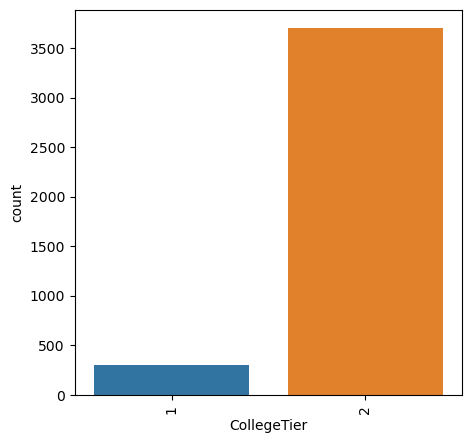

In [56]:
plt.figure(figsize=(5,5)) 
sns.countplot(data=df, x='CollegeTier') 
plt.xticks(rotation=90)
plt.show()

Most of the candidates are from College Trier2

In [57]:
df['CollegeCityTier'].value_counts()

CollegeCityTier
0    2797
1    1201
Name: count, dtype: int64

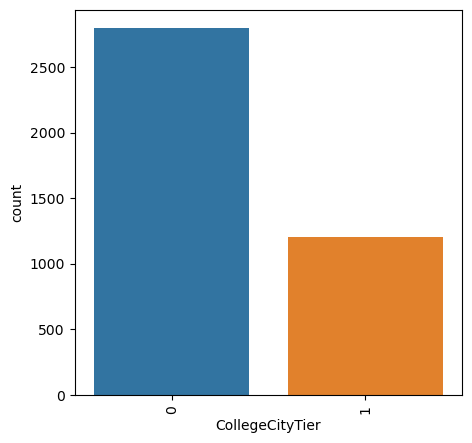

In [58]:
plt.figure(figsize=(5,5)) 
sns.countplot(data=df, x='CollegeCityTier') 
plt.xticks(rotation=90)
plt.show()

Most of them are from City Trier 2

## Categorical Features

### Gender

In [59]:
df['Gender'].value_counts()

Gender
m    3041
f     957
Name: count, dtype: int64

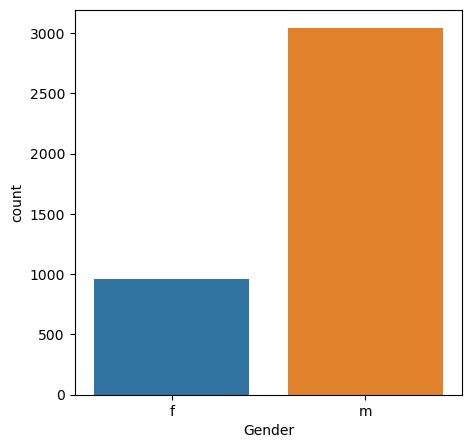

In [60]:
plt.figure(figsize=(5,5))
sns.countplot(data = df, x='Gender')
plt.show()

There are more male candidates than females.

In [61]:
categorical_cols.columns

Index(['DOL', 'Designation', 'JobCity', 'Gender', '10board', '12board',
       'Degree', 'Specialization', 'CollegeState'],
      dtype='object')

### 10th Board

In [62]:
df['10board'].unique()

array(['board ofsecondary education,ap', 'cbse', 'state board',
       'mp board bhopal', 'icse',
       'karnataka secondary school of examination', 'up',
       'karnataka state education examination board', 'ssc',
       'kerala state technical education', '0', 'bseb',
       'state board of secondary education, andhra pradesh',
       'matriculation', 'gujarat state board', 'karnataka state board',
       'wbbse', 'maharashtra state board', 'icse board', 'up board',
       'board of secondary education(bse) orissa',
       'little jacky matric higher secondary school',
       'uttar pradesh board', 'bsc,orissa', 'mp board', 'upboard',
       'matriculation board', 'j & k bord', 'rbse',
       'central board of secondary education', 'pseb', 'jkbose',
       'haryana board of school education,(hbse)', 'metric', 'ms board',
       'kseeb', 'stateboard', 'maticulation',
       'karnataka secondory education board', 'mumbai board', 'sslc',
       'kseb', 'board secondary  education', 'm

From the above values we can see that the data is not cleaned the boards must be in a category of CBSE ICSE and STATE so we have to make them in that category first.

In [63]:
df['10board'].mode()

0    cbse
Name: 10board, dtype: object

Replacing the missing values with mode

In [64]:
df['10board'].replace(0,'cbse',inplace=True)

In [65]:
# Creating a function to categorize the values
def board(val):
  if type(val) == str:
    if any(s in val for s in ['central', 'cbse', 'cbsc']):
      return 'CBSE'
    if 'ics' in val:
      return 'ICSE'
    else:
      return 'STATE'
  else:
    return np.nan

In [66]:
df['10board'] = df['10board'].apply(lambda x: board(x))

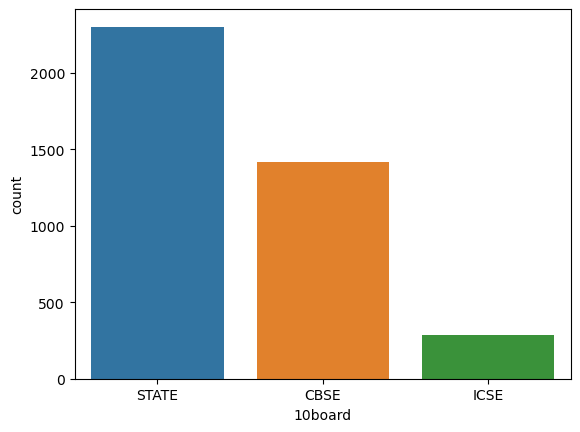

In [67]:
sns.countplot(data=df, x='10board')
plt.show()

### 12th Board

In [68]:
df['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', '0', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate s

In this column also we don't have clean data so we follow the steps of 10board,

In [69]:
df['12board'].mode()

0    cbse
Name: 12board, dtype: object

In [70]:
df['12board'].replace(0,'cbse',inplace=True)

In [71]:
df['12board'] = df['12board'].apply(lambda x: board(x))

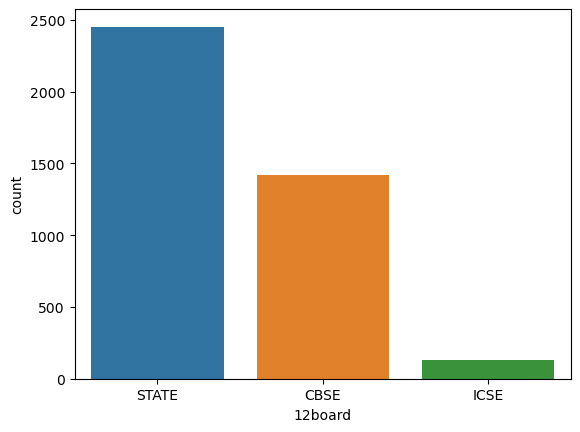

In [72]:
sns.countplot(data=df, x='12board')
plt.show()

The majority of graduates completed their 10th and 12th grades through the State Board or Central Board of Secondary Education

In [73]:
df['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

The column "Designation" contains 419 distinct job titles oﬀered to the graduates. Those titles can be subdivided into a smaller number of job roles.

In [74]:
# Creating a fucntion to categorize into smaller group of job roles
def refine_feature(input_val, input_list):
  if type(input_val) == str:
    for item in [i for i in input_list if len(i.split()) > 1]:
      if all([x in input_val for x in item.split()]):
        return item.title()
    for item in [i for i in input_list if len(i.split()) == 1]:
      if item in input_val:
        return item.title()
    if 'engineer' in input_val:
      return 'Hardware Engineer'
    try:
      matched_item = get_close_matches(input_val, input_list)[0]
      return matched_item.title()
    except:
      return 'Other'
  else:
    return np.nan

In [75]:
#Creating a list of job roles
role_list = ['software engineer', 'system engineer', 'developer', 'analyst', 'test engineer', 'dba', 
            'administrator', 'customer service', 'quality engineer', 'quality', 'automation engineer',
            'network engineer', 'support', 'it engineer', 'manager', 'management', 'programmer', 
            'tester', 'qa engineer', 'design']

In [76]:
df['Job_Role'] = df['Designation'].apply(lambda x: refine_feature(x, role_list))

In [77]:
df['Job_Role'].value_counts()

Job_Role
Software Engineer      936
Developer              710
Hardware Engineer      466
Analyst                411
System Engineer        399
Other                  345
Manager                124
Support                119
Test Engineer           77
Design                  68
Network Engineer        58
Quality Engineer        45
Programmer              43
Administrator           41
Quality                 38
Customer Service        37
Management              36
Dba                     20
Automation Engineer     15
It Engineer              5
Tester                   3
Qa Engineer              2
Name: count, dtype: int64

In [78]:
# Replacing few values
df['Job_Role'] = df['Job_Role'].replace({'It Engineer': 'Software Engineer', 'Network Engineer': 'System Engineer', 'Dba': 'System Engineer',
                                   'Support': 'Administrator', 'Customer Service': 'Administrator',
                                   'Tester': 'Test Engineer', 'Qa Engineer': 'Test Engineer', 'Quality': 'Test Engineer', 
                                   'Quality Engineer': 'Test Engineer', 'Automation Engineer': 'Test Engineer', 
                                   'Programmer': 'Developer', 'Management': 'Manager', 'Design': 'Other'})

In [79]:
df['Job_Role'].value_counts()

Job_Role
Software Engineer    941
Developer            753
System Engineer      477
Hardware Engineer    466
Other                413
Analyst              411
Administrator        197
Test Engineer        180
Manager              160
Name: count, dtype: int64

<Axes: ylabel='Job_Role'>

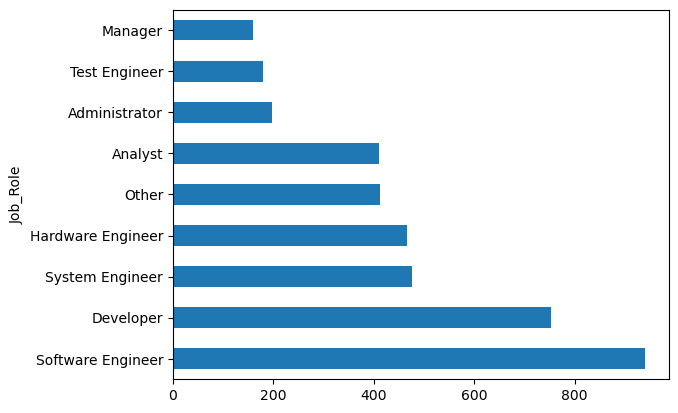

In [80]:
df['Job_Role'].value_counts().sort_values(ascending=False).plot(kind='barh')

Insights:
    Graduates are most commonly employed as Software Engineers follwed by Developers and Analysts.

### Job City

In [81]:
df['JobCity'].unique()

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', '-1',
       'mohali', 'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida',
       'delhi', 'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi',
       'Mangalore', 'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon',

In [82]:
df['JobCity'].value_counts()

JobCity
Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: count, Length: 339, dtype: int64

This column is need to be cleaned as we can see the same city is repeating as unique values multiple times, So we need to bring them as one.

In [83]:
m = ['navi mumbai','mumbai','navi mumbai , hyderabad']
n = ['noida','greater noida','nouda','a-64,sec-64,noida']
g = ['gurgaon','gurgoan','gurga','guragaon']
d = ['delhi','new delhi','new delhi - jaisalmer','delhi/ncr','new dehli']
p = ['pune','punr']
gh = ['ghaziabad','gaziabaad','indirapuram, ghaziabad','gajiabaad']
k = ['kochi/cochin','kochi','kochi/cochin, chennai and coimbatore']
h = ['hyderabad','hyderabad(bhadurpally)','hderabad']
b = ['bangalore','banglore','bengaluru','banagalore','banaglore','asifabadbanglore']
ch = ['chennai','chennai & mumbai','chennai, bangalore']
v = ['vsakhapttnam','visakhapatnam','vizag']
u = ['unnao','una']
tr = ['trivandrum','technopark, trivandrum']
t = ['tirupathi','tirupati']
bh = ['bhubaneswar','bhubaneshwar','bhubneshwar']

In [84]:
df['JobCity'] = np.where(df['JobCity'].isin(m),'mumbai',df['JobCity'])
df['JobCity'] = np.where(df['JobCity'].isin(n),'noida',df['JobCity'])
df['JobCity'] = np.where(df['JobCity'].isin(g),'gurgaon',df['JobCity'])
df['JobCity'] = np.where(df['JobCity'].isin(d),'delhi',df['JobCity'])
df['JobCity'] = np.where(df['JobCity'].isin(p),'pune',df['JobCity'])
df['JobCity'] = np.where(df['JobCity'].isin(gh),'ghaziabad',df['JobCity'])
df['JobCity'] = np.where(df['JobCity'].isin(k),'kochi',df['JobCity'])
df['JobCity'] = np.where(df['JobCity'].isin(h),'hyderabad',df['JobCity'])
df['JobCity'] = np.where(df['JobCity'].isin(b),'bangaluru',df['JobCity'])
df['JobCity'] = np.where(df['JobCity'].isin(ch),'chennai',df['JobCity'])
df['JobCity'] = np.where(df['JobCity'].isin(v),'vishakapatnam',df['JobCity'])
df['JobCity'] = np.where(df['JobCity'].isin(u),'unnao',df['JobCity'])
df['JobCity'] = np.where(df['JobCity'].isin(tr),'trivandrum',df['JobCity'])
df['JobCity'] = np.where(df['JobCity'].isin(t),'tirupathi',df['JobCity'])
df['JobCity'] = np.where(df['JobCity'].isin(bh),'bhubaneshwar',df['JobCity'])


In [85]:
df['JobCity'].value_counts()

JobCity
Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: count, Length: 329, dtype: int64

In [86]:
# replacing -1 with others

df['JobCity'] = df['JobCity'].apply(lambda x: 'other' if x =='-1' else str(x).lower().strip() )

In [87]:
df['JobCity'].value_counts()

JobCity
bangalore           650
other               461
noida               389
hyderabad           370
pune                328
                   ... 
asansol               1
india                 1
bhagalpur             1
bikaner               1
asifabadbanglore      1
Name: count, Length: 228, dtype: int64

<Axes: ylabel='JobCity'>

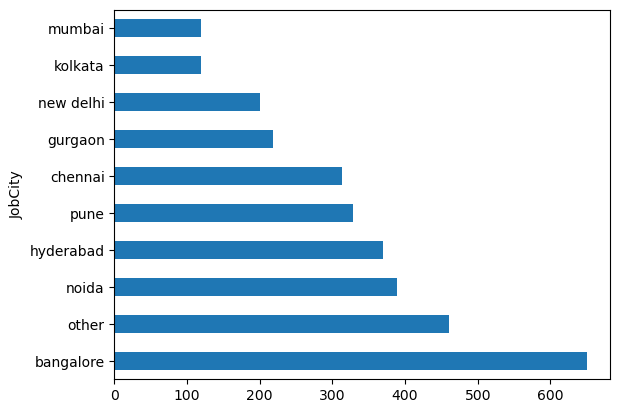

In [88]:
df['JobCity'].value_counts().sort_values(ascending=False)[0:10].plot(kind='barh')

Graduates mostly work in Bangalore.

### Degree

In [89]:
df['Degree'].value_counts()

Degree
B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: count, dtype: int64

<Axes: ylabel='Degree'>

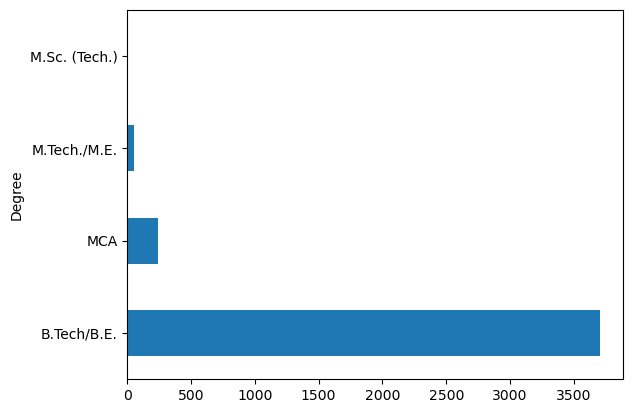

In [90]:
df['Degree'].value_counts().plot(kind='barh')

Most of them have a B.Tech\B.E degree.



In [91]:
df['Specialization'].unique()

array(['computer engineering',
       'electronics and communication engineering',
       'information technology', 'computer science & engineering',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications',
       'instrumentation and control engineering', 'computer application',
       'electronics and computer engineering', 'electrical engineering',
       'applied electronics and instrumentation',
       'electronics & instrumentation eng',
       'information science engineering', 'civil engineering',
       'mechanical and automation', 'industrial & production engineering',
       'control and instrumentation engineering',
       'metallurgical engineering',
       'electronics and instrumentation engineering',
       'electronics engineering', 'ceramic engineering',
       'chemical engineering', 'aeronautical engineering', 'other',
       'biotechnology', 'embedded systems technology',
       'electrical and power engi

In [92]:
df['Specialization'].describe()

count                                          3998
unique                                           46
top       electronics and communication engineering
freq                                            880
Name: Specialization, dtype: object

<Axes: xlabel='Specialization'>

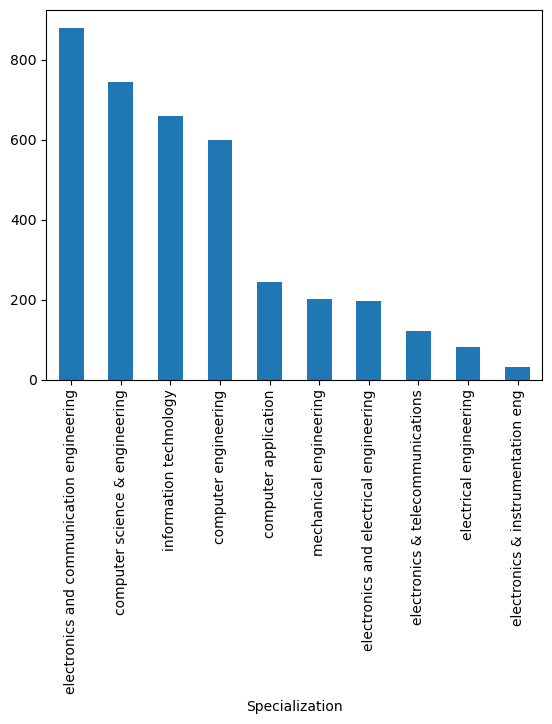

In [93]:
df['Specialization'].value_counts()[0:10].plot(kind='bar')

Most of them are with Specialization of Electronics and Communication Engineering follwed by Computer Science.

In [94]:
df['CollegeState'].value_counts()

CollegeState
Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: count, dtype: int64

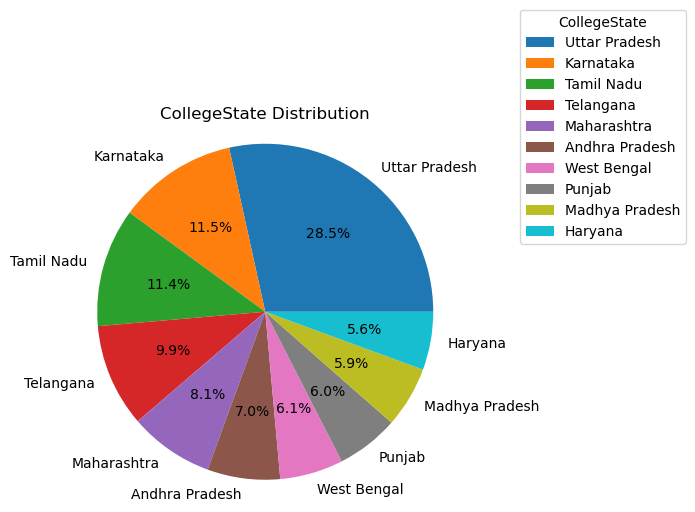

In [95]:
df['CollegeState'].value_counts().sort_values(ascending=False)[0:10].plot(kind='pie',autopct='%.1f%%')

# Customize the plot (add title, labels, etc.)
plt.title('CollegeState Distribution')
plt.ylabel('')  # Remove y-axis label
plt.legend(title='CollegeState', bbox_to_anchor=(1, 1), loc='center left')  # Move legend to the right
plt.axis('equal')  # Set aspect ratio to be equal for a circular pie
plt.show()

Most candidates attended the Colleges in Uttar Pradesh state. Following that are Karnataka and Tamil Nadu states as the next state where most candidates attended college.

### BiVariate Analysis

In [96]:
# Creating a function to understnad the relationships between columns
def pearson_test(data1, data2, significance_level):
    correlation_coefficient, p_value = st.pearsonr(data1, data2)
    print('correlation coefficient=%.3f, p-value=%.3f' % (correlation_coefficient, p_value))

    if p_value < significance_level:
        print("Reject null hypothesis: There is significant correlation.")
    else:
        print("Fail to reject null hypothesis: There is no significant correlation.")

### Salary vs CollegeGPA

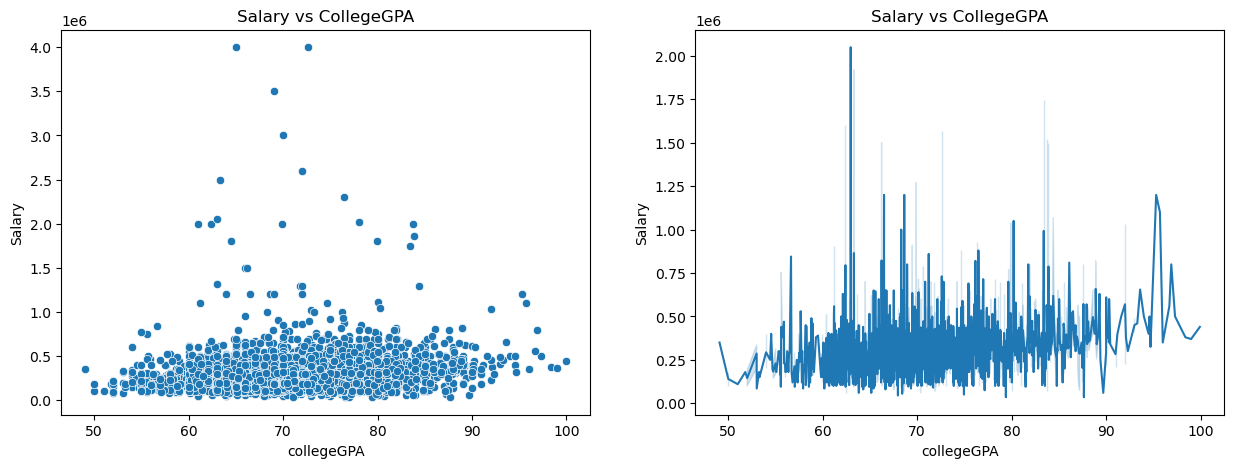

In [97]:
# Salary vs CollegeGPA

fig,axs=plt.subplots(1,2,figsize=(15,5),)
sns.scatterplot(data=df,x='collegeGPA',y='Salary',ax=axs[0])
axs[0].set_title('Salary vs CollegeGPA')

sns.lineplot(data=df,x='collegeGPA',y='Salary',ax=axs[1])
axs[1].set_title('Salary vs CollegeGPA')

plt.show()

In [98]:
pearson_test(df['collegeGPA'], df['Salary'], significance_level=0.05)

correlation coefficient=0.148, p-value=0.000
Reject null hypothesis: There is significant correlation.


Insights:

    Correlation Analysis: There is a significant positive correlation between CGPA and Salary highlighting the influence of academic performance in determining Salary outcomes.

    Threshold Effect: Candidates with CGPA above a certain threshold, such as 60%, are more likely to secure employment opportunities with higher Salaries compared to those below the threshold.

    Employer Perspective: CGPA serves as a valuable criterion for employers when evaluating candidate qualifications and determining Salary offers, with higher CGPA often associated with higher value to the organization.


### Salary vs Gender

<Axes: xlabel='Gender', ylabel='Salary'>

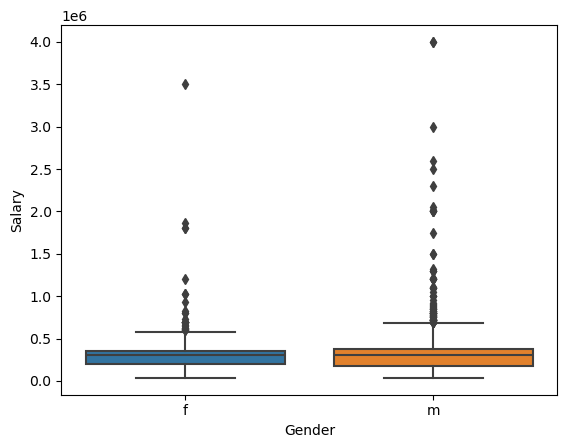

In [99]:
sns.boxplot(data = df, x='Gender',y='Salary')

From the plot, it is seen that the distribution of salary for males is higher, which also means they earn more. But as we saw in earlier analaysis, that the number of males to females in this study is not equal. This also implies that there were more males than females in the 2015 study.

### Salary Vs Job

In [100]:
order = df.groupby('Job_Role')['Salary'].mean().sort_values().index

df.groupby('Job_Role')['Salary'].describe().round(1).sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
Job_Role,,,,,,,,
Administrator,197.0,230177.7,120526.5,60000.0,150000.0,200000.0,255000.0,910000.0
Other,413.0,247046.0,230031.4,40000.0,145000.0,200000.0,280000.0,2000000.0
Developer,753.0,267994.7,221494.3,35000.0,135000.0,240000.0,340000.0,3000000.0
Hardware Engineer,466.0,291083.7,172999.6,50000.0,180000.0,265000.0,355000.0,1860000.0
Analyst,411.0,317335.8,158333.6,50000.0,205000.0,305000.0,360000.0,2020000.0
Test Engineer,180.0,329022.2,314984.9,60000.0,180000.0,310000.0,400000.0,4000000.0
Software Engineer,941.0,348512.2,223980.5,50000.0,240000.0,315000.0,400000.0,4000000.0
System Engineer,477.0,355167.7,176861.3,35000.0,315000.0,330000.0,415000.0,3500000.0
Manager,160.0,364687.5,225009.2,50000.0,210000.0,312500.0,442500.0,1320000.0


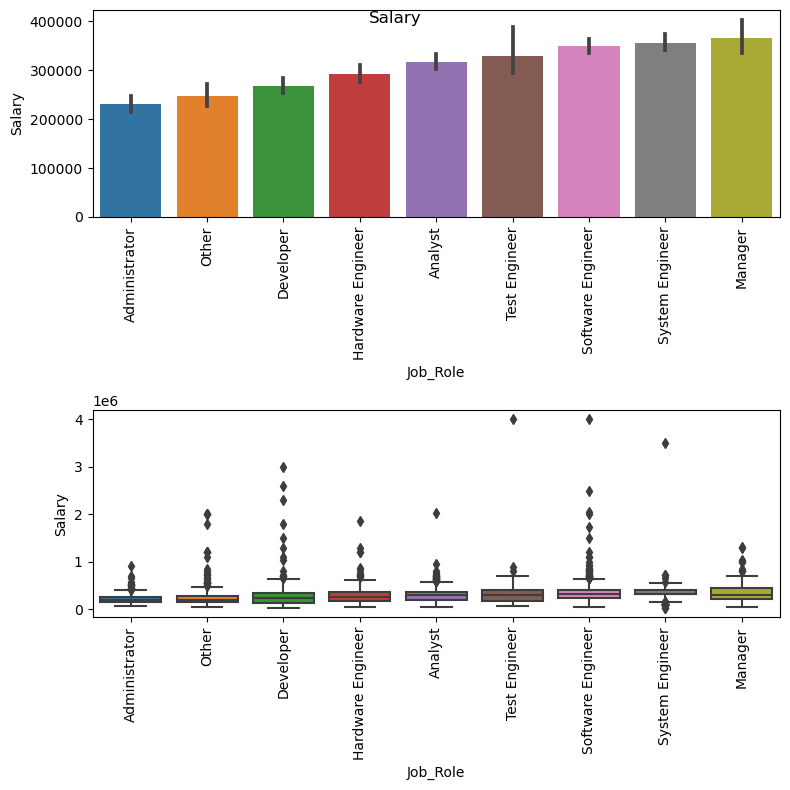

In [101]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))
sns.barplot(x='Job_Role', y='Salary', data=df, order=order, ax=ax1)
sns.boxplot(x='Job_Role', y='Salary', data=df, order=order, ax=ax2)
ax1.tick_params('x', labelrotation=90)
ax2.tick_params('x', labelrotation=90)
plt.tight_layout()
plt.suptitle('Salary')
plt.show()

Managers and system, software, and test engineers earn the highest salaries.

### Salary vs Degree

In [102]:
df.groupby('Degree')['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Degree,,,,,,,,
B.Tech/B.E.,3700.0,308622.702703,203358.186090,35000.0,190000.0,300000.0,370000.0,4000000.0
M.Sc. (Tech.),2.0,320000.000000,197989.898732,180000.0,250000.0,320000.0,390000.0,460000.0
M.Tech./M.E.,53.0,366132.075472,301422.335815,40000.0,180000.0,340000.0,440000.0,1860000.0
MCA,243.0,280802.469136,306936.465540,50000.0,145000.0,220000.0,330000.0,4000000.0


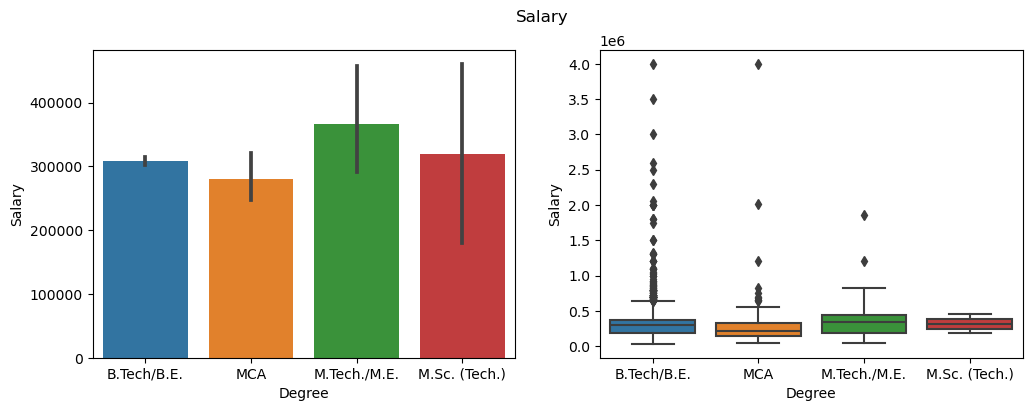

In [103]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Degree', y='Salary', data=df, ax=ax1)
sns.boxplot(x='Degree', y='Salary', data=df, ax=ax2)
plt.suptitle('Salary')
plt.show()

Mtech graduates earn more salary than Btech graduates.

In [104]:
specializations = [
    ('electronics|electrical|communication|mechanical|system|instrumentation', 'engineering|eng|technology|communication|instrumentation|automation'),
    ('computer|information', 'science|engineering|technology|application|networking'),
    ('civil|industrial|automobile|aeronautical|polymer|bio|chemical|metallurgical|ceramic', 'engineering|technology')
]

choices = ['electrical engineering', 'computer science', 'industrial engineering']

conditions = []

for spec in specializations:
    conditions.append((df['Specialization'].str.contains(spec[0]) & df['Specialization'].str.contains(spec[1])))

df['Speciality'] = np.select(conditions, choices, default='other')

df['Speciality'] = df['Speciality'].str.title()

df['Speciality'].value_counts(dropna=False)

Speciality
Computer Science          2285
Electrical Engineering    1614
Industrial Engineering      80
Other                       19
Name: count, dtype: int64

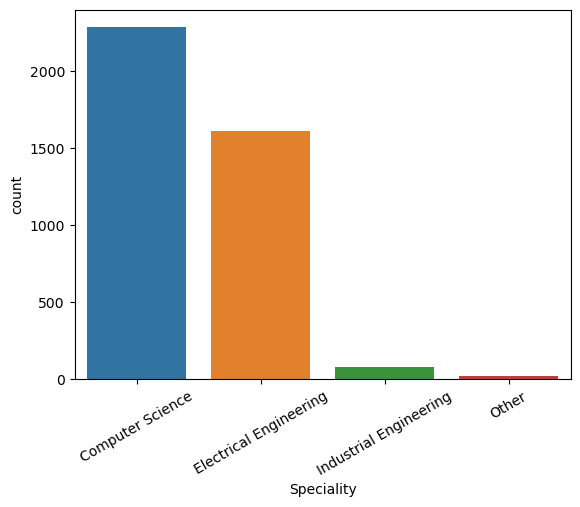

In [105]:
sns.countplot(data=df, x='Speciality')
plt.xticks(rotation=30)
plt.show()

Text(0.5, 1.0, 'Distribution of salary by Specialization')

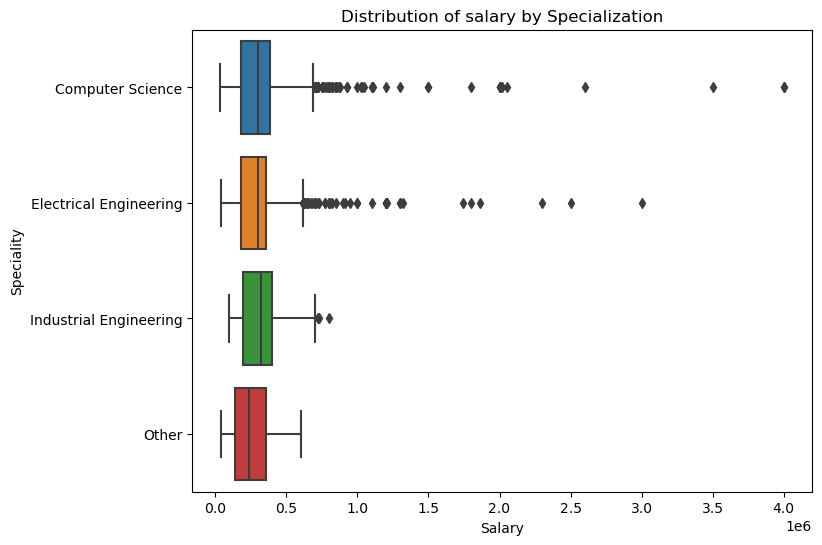

In [106]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Speciality',x='Salary',data=df)
plt.title("Distribution of salary by Specialization")

Computer Science (CSE) has the most outlier cases - larger salary cases comapred to other fields.

### Salary Vs Experience

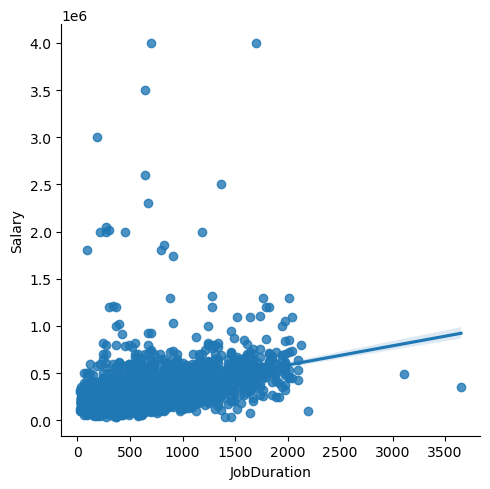

In [107]:

sns.lmplot(x="JobDuration", y="Salary", data=df)

Higher the experience higher the salary.

## Research Question

    After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.



In [108]:
df1 = df[df['Designation'].isin(['programmer analyst', 'software engineer', 'hardware engineer', 'associate engineer'])]
df1

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,JobAge,JobDuration,Job_Role,Speciality
19,325000.0,2014-09-01,2015-12-31,software engineer,pune,f,1990-11-30,79.00,CBSE,2008,...,NaN,0.8192,0.2668,-0.2714,-0.40780,-0.1295,24.0,486.0,Software Engineer,Computer Science
20,320000.0,2010-11-01,2012-09-01,software engineer,bangalore,f,1988-07-25,91.20,STATE,2006,...,NaN,-0.1082,0.9688,0.5269,-0.29020,0.3444,22.0,670.0,Software Engineer,Computer Science
21,200000.0,2012-08-01,2013-12-01,software engineer,other,f,1991-08-20,75.67,STATE,2007,...,NaN,-1.0355,-0.5913,-1.3599,0.06223,-1.3539,21.0,487.0,Software Engineer,Computer Science
24,335000.0,2014-06-01,2015-06-01,programmer analyst,hyderabad,m,1993-06-28,88.00,STATE,2010,...,NaN,0.4155,0.8027,0.1357,-0.99500,-0.6692,21.0,365.0,Analyst,Computer Science
31,340000.0,2014-08-01,2015-04-01,software engineer,bangalore,m,1992-10-23,77.20,STATE,2010,...,NaN,-0.0154,1.2114,1.0859,-1.50210,0.2889,22.0,243.0,Software Engineer,Computer Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,550000.0,2013-07-01,2014-04-01,software engineer,bangalore,m,1989-07-22,69.16,STATE,2006,...,NaN,-0.5719,0.5008,-0.4891,0.41480,-1.2354,24.0,274.0,Software Engineer,Computer Science
3981,220000.0,2014-09-01,2015-12-31,software engineer,gurgaon,m,1991-12-17,53.40,CBSE,2009,...,NaN,0.1282,-0.2871,-0.1437,-1.12180,1.4386,23.0,486.0,Software Engineer,Computer Science
3984,480000.0,2011-12-01,2015-12-31,software engineer,gurgaon,f,1990-01-18,89.80,CBSE,2007,...,NaN,-0.2628,0.1888,0.3817,-0.29020,1.6082,21.0,1491.0,Software Engineer,Computer Science
3989,300000.0,2014-09-01,2015-12-31,software engineer,bangalore,m,1991-11-23,74.88,STATE,2010,...,NaN,0.1282,0.0459,1.2396,1.03330,0.6721,23.0,486.0,Software Engineer,Computer Science


In [109]:
average_salary = df1['Salary'].mean()
print(f'The average salary for these roles is: {average_salary}')

The average salary for these roles is: 339790.4624277457


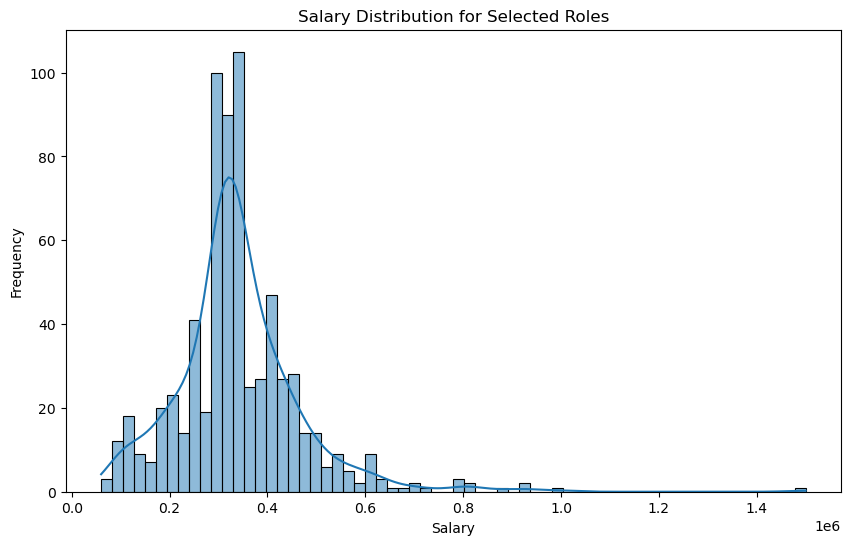

In [110]:
plt.figure(figsize=(10,6))
sns.histplot(data=df1, x="Salary", kde=True)
plt.title('Salary Distribution for Selected Roles')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [111]:
max_salary = df1['Salary'].max()

In [112]:
if max_salary >= 250000 and max_salary <= 300000:
    print("The claim that fresh graduates can earn up to 2.5-3 lakhs is supported by the data.")
else:
    print("The claim that fresh graduates can earn up to 2.5-3 lakhs is not supported by the data.")

The claim that fresh graduates can earn up to 2.5-3 lakhs is not supported by the data.


In [113]:
avg_salary=df1['Salary'].mean()
avg_salary

339790.4624277457

In [114]:
if avg_salary >= 250000 and avg_salary <= 300000:
    print("The claim that fresh graduates can earn up to 2.5-3 lakhs is supported by the data.")
else:
    print("The claim that fresh graduates can earn up to 2.5-3 lakhs is not supported by the data.")

The claim that fresh graduates can earn up to 2.5-3 lakhs is not supported by the data.


In [115]:
from scipy.stats import zscore
df1= df1[zscore(df1['Salary']) < 3]

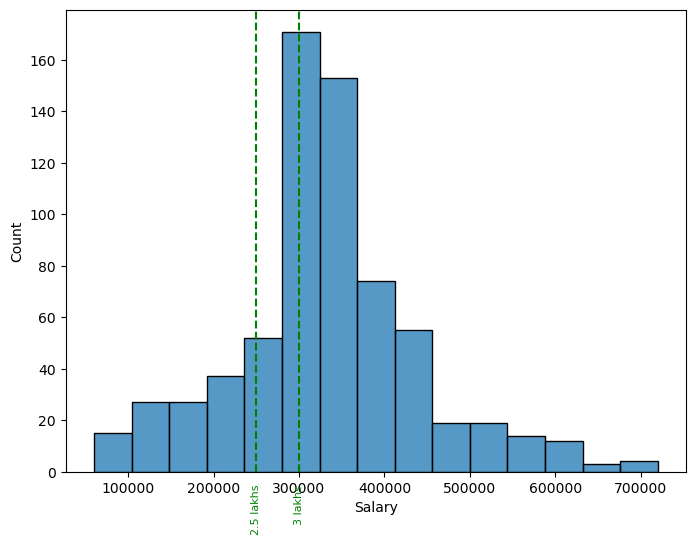

In [116]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df1['Salary'], bins=15)
ax.axvline(250000, ls='--', color='g')
ax.axvline(300000, ls='--', color='g')
ax.text(250000, -5, "2.5 lakhs", fontsize=8, c='green', va='top', ha='center', rotation=90)
ax.text(300000, -5, "3 lakhs", fontsize=8, c='green', va='top', ha='center', rotation=90)
plt.show()

## Is there a relationship between gender and specialization?

In [117]:
from scipy.stats import chi2_contingency

# Creating a contingency table
contingency_table = pd.crosstab(df['Speciality'], df['Gender'])

# Perform chi-square test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 20.899113570502816
p-value: 0.00011047893617613491


Interpretation

Since the p-value is much smaller than the typical significance level of 0.05, I reject the null hypothesis - H0: Gender and specialization are independent.

Therefore, I conclude that there is a significant relationship between gender and specialization in the data provided

## Conclusion:

Academic Performance:

Students who have completed their 10th and 12th grades from CBSE and ICSE boards are likely to have better skills in English, quantitative aptitude, and logical reasoning. This can help them secure a higher salary package post-college compared to students from State Boards.
The percentage achieved in 12th grade has a strong correlation with the percentage in 10th grade, but it doesn't significantly influence the college GPA.
College GPA distribution also shows a concentration between 65 to 85, with fewer students having exceptionally high GPAs above 95.

Gender Distribution:

Males are around 70% of the dataset, indicating an imbalance in the dataset.
Female students with advanced education are likely to earn a higher starting salary as freshers compared to their male counterparts.

College State and Job City:

Major job hubs include Bangalore, Noida, Pune, Gurgaon, and Mumbai, while top college states are Uttar Pradesh, Karnataka, Tamil Nadu.
These locations indicate strong employment and educational infrastructure, respectively.

Correlation Analysis:

There is a slight positive correlation between salary and factors such as age, academic performance, and AMCAT scores. The strongest correlation with salary is the duration of employment at the company.

Employment Insights:

The majority of graduates find employment as software engineers and developers.
Graduates from Tier 1 colleges tend to earn higher salaries than their counterparts from Tier 2 colleges, with the highest salaries observed in Gujarat, Maharashtra, and Karnataka.

Salary Claim:

Contrary to the claim made in the Indian Times article, most fresh graduates earn an annual salary exceeding 3 lakhs.

Gender-Specialization Insights:

The data indicates there is significant correlation between gender and chosen specialization.